# Gold Recovery Set - Model Analysis 

## Introduction

The purpose of the project is to look into the data, analyzing its particularities, and building the model into calculate the model's symmetric mean absolute percentage error (sMAPE).

## Prep Work

### Basic Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [5]:
from sklearn.dummy import DummyClassifier

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Data Intro

In [8]:
data1 = pd.read_csv('/datasets/gold_recovery_train.csv')
data2 = pd.read_csv('/datasets/gold_recovery_test.csv')
data3 = pd.read_csv('/datasets/gold_recovery_full.csv')

## Examining the Data

### Data Inspection

#### Training Set

In [9]:
print(data1.head())

                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.

In [10]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [11]:
print(data1.describe())

       final.output.concentrate_ag  final.output.concentrate_pb  \
count                 16788.000000                 16788.000000   
mean                      4.716907                     9.113559   
std                       2.096718                     3.389495   
min                       0.000000                     0.000000   
25%                       3.971262                     8.825748   
50%                       4.869346                    10.065316   
75%                       5.821176                    11.054809   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  16490.000000                 16789.000000   
mean                       8.301123                    39.467217   
std                        3.825760                    13.917227   
min                        0.000000                     0.000000   
25%                        6.939185                    4

#### Test Set

In [12]:
print(data2.head())

                  date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   
3  2016-09-01 03:59:59                     215.336236   
4  2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777

In [13]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [14]:
print(data2.describe())

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
count                    5554.000000                       5572.000000   
mean                      170.515243                          8.482873   
std                        49.608602                          3.353105   
min                         0.000103                          0.000031   
25%                       143.340022                          6.411500   
50%                       176.103893                          8.023252   
75%                       207.240761                         10.017725   
max                       274.409626                         40.024582   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
count                      5856.000000                     5690.000000   
mean                          7.264651                        1.321420   
std                           0.611526                        0.693246   
min                           5.65000

#### Full Set

In [15]:
print(data3.head())

                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.

In [16]:
print(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [17]:
print(data3.describe())

       final.output.concentrate_ag  final.output.concentrate_pb  \
count                 22627.000000                 22629.000000   
mean                      4.781559                     9.095308   
std                       2.030128                     3.230797   
min                       0.000000                     0.000000   
25%                       4.018525                     8.750171   
50%                       4.953729                     9.914519   
75%                       5.862593                    10.929839   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  22331.000000                 22630.000000   
mean                       8.640317                    40.001172   
std                        3.785035                    13.398062   
min                        0.000000                     0.000000   
25%                        7.116799                    4

#### Conclusions

There are some columns present that are not present in others, such as final output columns for various metals and solutions, and other such. Other than that, not much needs to be said.

### Recovery Calculation Checks

#### Preliminary Corrections

In [18]:
data1['rougher.input.feed_au'].fillna(data1['rougher.input.feed_au'].mean(), inplace=True)
data1['rougher.output.tail_au'].fillna(data1['rougher.output.tail_au'].mean(), inplace=True)
data1['final.output.recovery'].fillna(data1['final.output.recovery'].mean(), inplace=True)

In [19]:
data3['rougher.input.feed_au'].fillna(data3['rougher.input.feed_au'].mean(), inplace=True)
data3['rougher.output.tail_au'].fillna(data3['rougher.output.tail_au'].mean(), inplace=True)
data3['final.output.recovery'].fillna(data3['final.output.recovery'].mean(), inplace=True)

#### Calculation Checks

In [20]:
data1['calculated_recovery'] = (data1['final.output.recovery'] /
                            (data1['rougher.input.feed_au'] * 
                            (1 - data1['rougher.output.tail_au']))) * 100

print(data1[['calculated_recovery']].head())

   calculated_recovery
0         -6388.283889
1         -5784.619947
2         -6586.040729
3        -14006.987308
4        -93470.943049


In [21]:
data3['calculated_recovery'] = (data3['final.output.recovery'] /
                            (data3['rougher.input.feed_au'] * 
                            (1 - data3['rougher.output.tail_au']))) * 100

print(data3[['calculated_recovery']].head())

   calculated_recovery
0         -6388.283889
1         -5784.619947
2         -6586.040729
3        -14006.987308
4        -93470.943049


#### Data Verification

In [22]:
print(data1[['final.output.recovery', 'rougher.input.feed_au', 'rougher.output.tail_au']].describe())
print(data1.isnull().sum())
print(data1[['final.output.recovery', 'rougher.input.feed_au', 'rougher.output.tail_au']].dtypes)

       final.output.recovery  rougher.input.feed_au  rougher.output.tail_au
count           16860.000000           16860.000000            16860.000000
mean               67.213166               7.170717                1.763930
std                11.408166               2.994714                0.680980
min                 0.000000               0.000000                0.020676
25%                63.262484               6.209952                1.392400
50%                67.213166               7.429003                1.763930
75%                72.257216               8.954083                2.107259
max               100.000000              14.093363                9.688980
date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleane

In [23]:
print(data3[['final.output.recovery', 'rougher.input.feed_au', 'rougher.output.tail_au']].describe())
print(data3.isnull().sum())
print(data3[['final.output.recovery', 'rougher.input.feed_au', 'rougher.output.tail_au']].dtypes)

       final.output.recovery  rougher.input.feed_au  rougher.output.tail_au
count           22716.000000           22716.000000            22716.000000
mean               67.447488               7.565838                1.821193
std                11.102774               3.020350                0.652423
min                 0.000000               0.000000                0.020676
25%                63.905025               6.492090                1.475072
50%                67.450424               7.875433                1.821193
75%                72.494845               9.659693                2.144160
max               100.000000              14.093363                9.688980
date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleane

#### Conclusions

So far, attempts to calculate the recovery process have been rather inconclusive as the output shown were all negative, which suggest problems with both the data and/or the calculation. I will need to process it further.

## Analyzing the Data

### Prep Stages

In [24]:
scaler = StandardScaler()
data3[['scaled_feed_au', 'scaled_feed_ag', 'scaled_concentrate_au']] = scaler.fit_transform(
    data3[['rougher.input.feed_au', 'rougher.input.feed_ag', 'final.output.concentrate_au']]
)

In [25]:
data3 = data3.drop_duplicates()

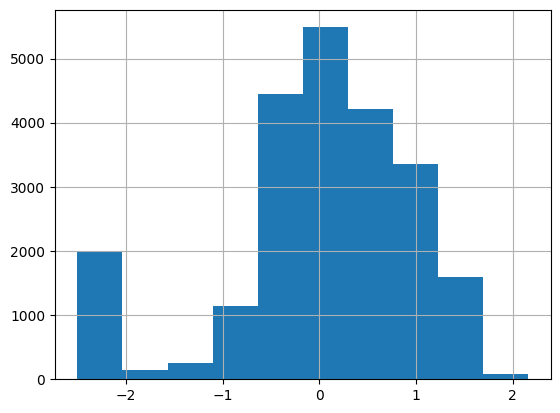

In [26]:
data3['scaled_feed_au'].hist()
plt.show()

In [27]:
X = data3[['scaled_feed_au', 'scaled_feed_ag', 'scaled_concentrate_au']]
y = data3['calculated_recovery']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Changes in Metal Concentrations

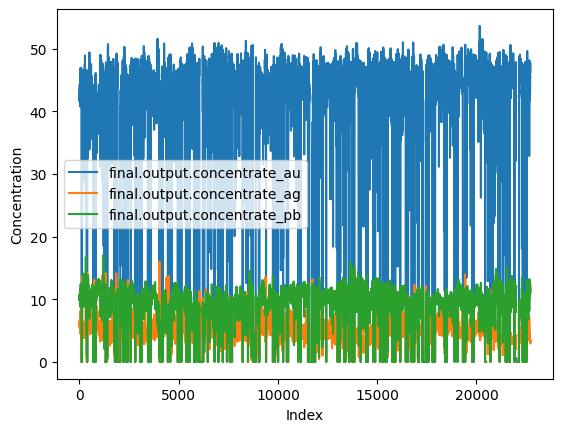

In [28]:
metals = ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']

for metal in metals:
    plt.plot(data3.index, data3[metal], label=f'{metal}')

plt.xlabel('Index')
plt.ylabel('Concentration')
plt.legend()
plt.show()

### Changes in Feed Particle Size Distribution

In [29]:
X = data3[['rougher.input.feed_size', 'scaled_feed_au', 'scaled_feed_ag', 'scaled_concentrate_au']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data, test_data = train_test_split(data3, test_size=0.2, random_state=42)

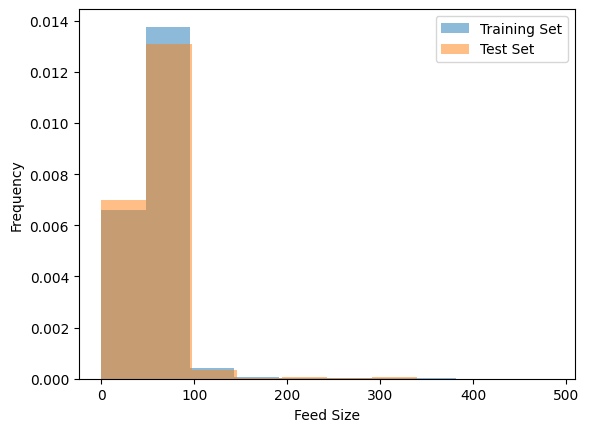

In [30]:
plt.hist(X_train['rougher.input.feed_size'], alpha=0.5, label='Training Set', density=True)
plt.hist(X_test['rougher.input.feed_size'], alpha=0.5, label='Test Set', density=True)
plt.xlabel('Feed Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Changes in Substance Concentrations

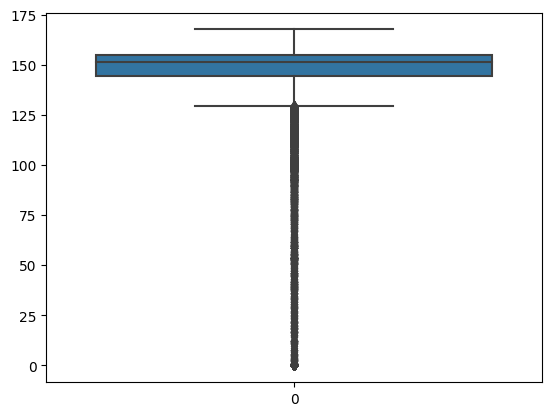

In [31]:
stages = ['final', 'primary_cleaner', 'rougher']
metals = ['au', 'ag', 'pb'] 

data3['total_concentration'] = data3[[f'{stage}.output.concentrate_{metal}' for stage in stages for metal in metals]].sum(axis=1)
sns.boxplot(data=data3['total_concentration'])
plt.show()

### Conclusions

As is noted from the dataset, there are several conclusions that can be drawn from this, namely that:

-  Gold had the highest concentrations compared to others (at around 40-50%), but was also the most variable, with large swings in the concentrate compared to silver and lead, with their more stable processes.
-  Most particles are concentrated at a feed size of around 50-100, with both the training and test sets being similar showing a degree of representation of the data.
-  Concentration of substances was mainly around 150, with the variables staying close around that range.

Any abnormal values (such as null values) were largely replaced with mean values for all the data used, so it was largely a moot point.

## Building the Model

### Initial Models

In [32]:
X = data3[['rougher.input.feed_size', 'scaled_feed_au', 'scaled_feed_ag', 'scaled_concentrate_au']]

rougher_X = data3[['rougher.input.feed_size', 'scaled_feed_au', 'scaled_feed_ag', 'scaled_concentrate_au']]
final_X = data3[['rougher.input.feed_size', 'scaled_feed_au', 'scaled_feed_ag', 'scaled_concentrate_au']]

rougher_y = data3['rougher.output.recovery']
final_y = data3['final.output.recovery']

rougher_X_train, rougher_X_test, rougher_y_train, rougher_y_test = train_test_split(rougher_X, rougher_y, test_size=0.2, random_state=42)
final_X_train, final_X_test, final_y_train, final_y_test = train_test_split(final_X, final_y, test_size=0.2, random_state=42)

In [33]:
rougher_X_train.replace([-np.inf, np.inf], np.nan, inplace=True)
rougher_X_test.replace([-np.inf, np.inf], np.nan, inplace=True)
final_X_train.replace([-np.inf, np.inf], np.nan, inplace=True)
final_X_test.replace([-np.inf, np.inf], np.nan, inplace=True)
 
rougher_X_train.fillna(rougher_y_train.mean(), inplace=True)
rougher_X_test.fillna(rougher_y_test.mean(), inplace=True)
final_X_train.fillna(final_y_train.mean(), inplace=True)
final_X_test.fillna(final_y_test.mean(), inplace=True)

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [34]:
rougher_y_train.replace([-np.inf, np.inf], np.nan, inplace=True)
rougher_y_test.replace([-np.inf, np.inf], np.nan, inplace=True)
final_y_train.replace([-np.inf, np.inf], np.nan, inplace=True)
final_y_test.replace([-np.inf, np.inf], np.nan, inplace=True)
 
rougher_y_train.fillna(rougher_y_train.mean(), inplace=True)
rougher_y_test.fillna(rougher_y_test.mean(), inplace=True)
final_y_train.fillna(final_y_train.mean(), inplace=True)
final_y_test.fillna(final_y_test.mean(), inplace=True)

In [35]:
rougher_model = RandomForestRegressor(random_state=42)
final_model = LinearRegression()

rougher_model.fit(rougher_X_train, rougher_y_train)
rougher_y_pred = rougher_model.predict(rougher_X_test)

final_model.fit(final_X_train, final_y_train)
final_y_pred = final_model.predict(final_X_test)

def sMAPE(y_true, y_pred):
    return 100 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

### Cross-Validation

In [36]:
from sklearn.model_selection import cross_val_score

rougher_scores = cross_val_score(rougher_model, rougher_X_train, rougher_y_train, cv=5, scoring='neg_mean_absolute_error')
final_scores = cross_val_score(final_model, final_X_train, final_y_train, cv=5, scoring='neg_mean_absolute_error')

print(f'Rougher CV sMAPE: {-rougher_scores.mean()}')
print(f'Final CV sMAPE: {-final_scores.mean()}') 

Rougher CV sMAPE: 5.76904394978593
Final CV sMAPE: 6.718395143090004


### Final sMAPE Value

In [37]:
sMAPE_final = 0.25 * sMAPE(rougher_y_test, rougher_y_pred) + 0.75 * sMAPE(final_y_test, final_y_pred)
print(f'Final sMAPE: {sMAPE_final:.2f}')

Final sMAPE: 10.35


## Conclusions

What the data shows is that the models created for both sets were reasonably accurate, with both sMAPE values between the rougher and final sets showing low numbers in the single digits, suggesting that both models were performing as well as they should. This bore out in the final sMAPE number, which shows a general balanced approach for both the rougher and final predictions. Some fine-tuning might be needed to better fit the data further, but overall is sufficient for use.